In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
import pandas as pd

data=pd.read_excel('직종별_2008-2024.xlsx', sheet_name=[0,1])
cross_2007=pd.read_excel('keco_2007.xlsx')
cross_2007=cross_2007[['세분류 직업명','세분류 직업명.1']]
cross_ksco=pd.read_excel('keco_ksco.xlsx')

df_2020=data[0]
df_2008=data[1]

df_2008['직종별'] =df_2008['직종별'].str.split().str[0]
df_2020['직종별']=df_2020['직종별'].str.split().str[0]  #번호 추출

df_2008['직종별'] = df_2008[df_2008['직종별'].str.len() == 3]['직종별']
df_2020['직종별']=df_2020[df_2020['직종별'].str.len()==3]['직종별']  #길이 3만 가져오기
df_2008.loc[1, '직종별'] = '전직종'
df_2020.loc[1, '직종별'] = '전직종'
df_2008.dropna(inplace=True)
df_2020.dropna(inplace=True)
cross_2007['세분류 직업명'] = cross_2007['세분류 직업명'].apply(str).str.zfill(4) #신 - 구
cross_2007.dropna(inplace=True) 
def split_and_expand(row):
    code1 = row['세분류 직업명']
    codes2 = row['세분류 직업명.1'].split('\n')
    
    return [{'세분류 직업명': code1, '세분류 직업명.1': code2.strip()} for code2 in codes2 if code2.strip()]

# 새로운 데이터프레임 생성
expanded_cross_2007 = pd.DataFrame([
    item for _, row in cross_2007.iterrows() for item in split_and_expand(row)
])

expanded_cross_2007['세분류 직업명'] = expanded_cross_2007['세분류 직업명'].str[:3]
expanded_cross_2007['세분류 직업명.1'] = expanded_cross_2007['세분류 직업명.1'].str[:3]
expanded_cross_2007.columns = ['세분류코드', '(구)세분류코드']

expanded_cross_2007 = expanded_cross_2007.drop_duplicates()


# 결과 출력
print(expanded_cross_2007.head(50) ) # 처음 10개 행 출력

    세분류코드 (구)세분류코드
0     011      011
2     012      012
8     013      013
13    013      014
14    013      016
15    013      012
16    014      018
18    014      019
19    015      017
22    016      015
26    021      021
27    022      021
29    023      022
33    024      023
37    025      024
42    026      024
46    027      027
48    028      026
50    028      025
52    029      028
55    029      029
58    029      071
59    031      031
65    032      032
70    032      115
72    033      101
73    033      033
74    110      044
76    121      043
77    121      045
78    122      043
79    122      045
81    131      201
83    132      202
84    133      203
86    133      204
89    134      205
90    134      202
93    134      204
94    135      202
95    136      206
96    140      141
103   151      151
106   152      161
108   153      191
111   154      171
113   155      222
115   155      221
118   156      181
120   157      211


In [4]:
merge_2018=pd.merge(df_2008,expanded_cross_2007,how='left', left_on='직종별',right_on='(구)세분류코드')
merge_2018.iloc[1,-2]='전직종'
merge_2018.iloc[0,-2]='직종별'
merge_2018.iloc[1:,1:-2]=merge_2018.iloc[1:,1:-2].astype(int)
merge_2018['eigen']=merge_2018.groupby('(구)세분류코드')['(구)세분류코드'].transform('count')

#merge_2018.iloc[2:,1:-3]=merge_2018.iloc[2:,1:-3].div(merge_2018.iloc[2:,-1],axis=0) #중복되는거 평탄화 근사임
merge_2018=merge_2018.iloc[:,1:-2]
merge_2018

,2008.1/2,2008.1/2.1,2008.1/2.2,2008.2/2,2008.2/2.1,2008.2/2.2,2009.1/2,2009.1/2.1,2009.1/2.2,2009.2/2,...,2018.2/2,2018.2/2.1,2018.2/2.2,2019.1/2,2019.1/2.1,2019.1/2.2,2019.2/2,2019.2/2.1,2019.2/2.2,세분류코드
0,현원,구인인원,채용인원,현원,구인인원,채용인원,현원 (명),구인인원 (명),채용인원 (명),현원 (명),...,현원 (명),구인인원 (명),채용인원 (명),현원 (명),구인인원 (명),채용인원 (명),현원 (명),구인인원 (명),채용인원 (명),직종별
1,7768188,625301,511602,7959995,442562,349357,8048203,424897,348387,8128516,...,12192880,756130,672219,12247216,810487,733478,12429758,687724,611815,전직종
2,6586,153,143,5983,57,59,7181,102,94,7899,...,6806,84,84,5735,85,85,5428,46,46,011
3,47852,328,322,49170,231,227,49865,294,274,49580,...,40823,608,599,43920,717,717,45148,455,388,012
4,47852,328,322,49170,231,227,49865,294,274,49580,...,40823,608,599,43920,717,717,45148,455,388,013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,9215,1123,1110,8381,198,191,9662,848,775,11832,...,16237,514,449,17058,2337,2311,18825,956,917,901
165,1545,45,45,2995,7,7,1657,62,62,1767,...,2207,47,44,2120,142,132,2020,31,31,902
166,1000,1548,1548,840,16,18,478,18,3,513,...,860,7,7,630,22,22,970,105,105,903
167,307,8,2,469,75,75,1139,0,0,9,...,90,45,0,110,21,21,126,9,9,904


In [5]:
merge_2018_1=pd.merge(merge_2018,df_2020,how='left', left_on='세분류코드', right_on='직종별').sort_index(axis=1)
clean_2018=merge_2018_1.drop(['세분류코드'], axis=1)
#ksco=ksco.transpose()
#ksco=ksco[1:]
#ksco.columns=ksco.iloc[0]
#ksco=ksco.iloc[1:,1:] 

# ksco_job=ksco.iloc[2::3,:] #채용인원
# ksco_require=ksco.iloc[1::3,:]#구직인원
# ksco=ksco.iloc[::3,:] #현원

clean_2018=clean_2018.transpose()
clean_2018.columns=clean_2018.iloc[-1]
clean_2018=clean_2018.iloc[:-1,1:-1]
# df_before_2020 = df.loc['2008.1/2':'2008.2/2.1']
# df_after_2020 = df.loc['2023.2/2.1':]
tmp=clean_2018['전직종']
clean_before=clean_2018.loc['2008.1/2':'2019.2/2.2','011':]
clean_before=clean_before.T.groupby(clean_before.columns).sum().T #2007은 합산
clean_before['전직종']=tmp
clean_after=clean_2018.loc['2020.1/2':]
clean_after=clean_after.T.groupby(clean_after.columns).first().T  #2018은 하나만
clean_combined = pd.concat([clean_before, clean_after])
keco_all=clean_combined.iloc[::3,:]
keco_require=clean_combined.iloc[1::3,:]
keco_job=clean_combined.iloc[2::3,:]

keco_job.index=keco_job.index.str.slice(0,8)
keco_require.index=keco_require.index.str.slice(0,8)
keco_merge=pd.merge(keco_job,keco_require, left_index=True, right_index=True, how='inner' ,suffixes=('_채용', '_구직'))
keco_merge=pd.merge(keco_merge,keco_all,left_index=True, right_index=True, how='inner')
keco_merge=keco_merge.sort_index(axis=1)



#keco_merge.to_csv('keco_직종별_수_최종.csv')
keco_merge

직종별,011,011_구직,011_채용,012,012_구직,012_채용,013,013_구직,013_채용,014,...,902_채용,903,903_구직,903_채용,904,904_구직,904_채용,전직종,전직종_구직,전직종_채용
2008.1/2,6586,153,143,47852,328,322,65474,769,702,6607,...,45,1000,1548,1548,307,8,2,7768188,625301,511602
2008.2/2,5983,57,59,49170,231,227,65403,290,286,5315,...,7,840,16,18,469,75,75,7959995,442562,349357
2009.1/2,7181,102,94,49865,294,274,67183,395,370,7719,...,62,478,18,3,1139,0,0,8048203,424897,348387
2009.2/2,7899,96,96,49580,247,232,65800,412,397,7337,...,19,513,391,391,9,4,0,8128516,465248,383229
2010.1/2,8293,125,120,52419,521,468,72597,693,619,7693,...,35,422,132,132,126,0,0,8931370,662167,541637
2010.2/2,5984,58,58,44157,412,403,63423,614,598,6105,...,18,382,242,242,279,0,0,9196034,610216,494828
2011.1/2,8724,134,125,43041,436,361,64651,650,545,6447,...,45,1374,0,0,710,32,11,9503816,636002,511805
2011.2/2,8479,73,73,45959,309,290,66751,571,503,6024,...,18,1288,0,0,445,37,0,9715637,649951,513402
2012.1/2,5816,102,99,42742,482,450,61263,786,737,5353,...,118,1097,110,110,74,25,0,9805150,626685,532061
2012.2/2,11432,170,170,40689,328,301,58838,514,483,5915,...,9,641,0,0,210,0,0,9884455,660219,554625


In [6]:
import pandas as pd
import re
# 데이터 로드 (예시 데이터를 사용하므로 실제 데이터에 맞게 조정이 필요할 수 있습니다)
df = keco_merge

# 열 그룹 식별 함수
def identify_column_groups(columns):
    groups = {}
    for col in columns:
        match = re.match(r'(\d+)(_구직|_채용)?$', col)
        if match:
            base = match.group(1)
            if base not in groups:
                groups[base] = []
            groups[base].append(col)
    return groups

# 조건에 따라 열 제거 함수
def remove_columns_based_on_condition(df, threshold=30):
    column_groups = identify_column_groups(df.columns)
    columns_to_remove = []
    
    for base, group in column_groups.items():
        if any(df[col].min() < threshold for col in group):
            columns_to_remove.extend(group)
    
    return df.drop(columns=columns_to_remove)

# 원본 데이터프레임 정보 출력
print("원본 데이터프레임 정보:")
print(df.info())

# 조건에 따라 열 제거
df_cleaned = remove_columns_based_on_condition(df)

# 정제된 데이터프레임 정보 출력
print("\n정제된 데이터프레임 정보:")
print(df_cleaned.info())

# 제거된 열 목록 출력
removed_columns = set(df.columns) - set(df_cleaned.columns)
print("\n제거된 열 목록:")
print(removed_columns)

# 정제된 데이터프레임을 CSV 파일로 저장
df_cleaned.to_csv('keco_직종별_수_최종.csv')
keco_cleaned=df_cleaned

원본 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2008.1/2 to 2024.1/2
Columns: 405 entries, 011 to 전직종_채용
dtypes: object(405)
memory usage: 105.7+ KB
None

정제된 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2008.1/2 to 2024.1/2
Columns: 363 entries, 011 to 전직종_채용
dtypes: object(363)
memory usage: 94.9+ KB
None

제거된 열 목록:
{'904_채용', '014_구직', '863_채용', '611', '240_구직', '233_채용', '014', '863', '902_구직', '240_채용', '614_구직', '884', '233_구직', '021', '884_채용', '903', '611_채용', '417_채용', '522', '904', '417', '021_구직', '522_구직', '302', '302_채용', '240', '522_채용', '902', '302_구직', '903_구직', '614_채용', '021_채용', '614', '884_구직', '863_구직', '417_구직', '903_채용', '014_채용', '904_구직', '611_구직', '233', '902_채용'}


이상치 수정 결과:
직종별          011 011_구직 011_채용    012 012_구직 012_채용    013 013_구직 013_채용  \
2008-01-01  6586    153    143  47852    328    322  65474    769    702   
2008-07-01  5983     57     59  49170    231    227  65403    290    286   
2009-01-01  7181    102     94  49865    294    274  67183    395    370   
2009-07-01  7899     96     96  49580    247    232  65800    412    397   
2010-01-01  8293    125    120  52419    521    468  72597    693    619   

직종별           015  ... 885_채용     890 890_구직 890_채용    901 901_구직 901_채용  \
2008-01-01  21328  ...   1970  147677  16510  12334   9215   1123   1110   
2008-07-01  22410  ...   1470  133047   9302   7392   8381    198    191   
2009-01-01  20401  ...   1446  178447   9599   7746   9662    848    775   
2009-07-01  26632  ...   1541  205720  20152  15801  11832    657    586   
2010-01-01  26215  ...   1862  178042  18802  13696   9955   1684   1645   

직종별             전직종  전직종_구직  전직종_채용  
2008-01-01  7768188  625301  511602  

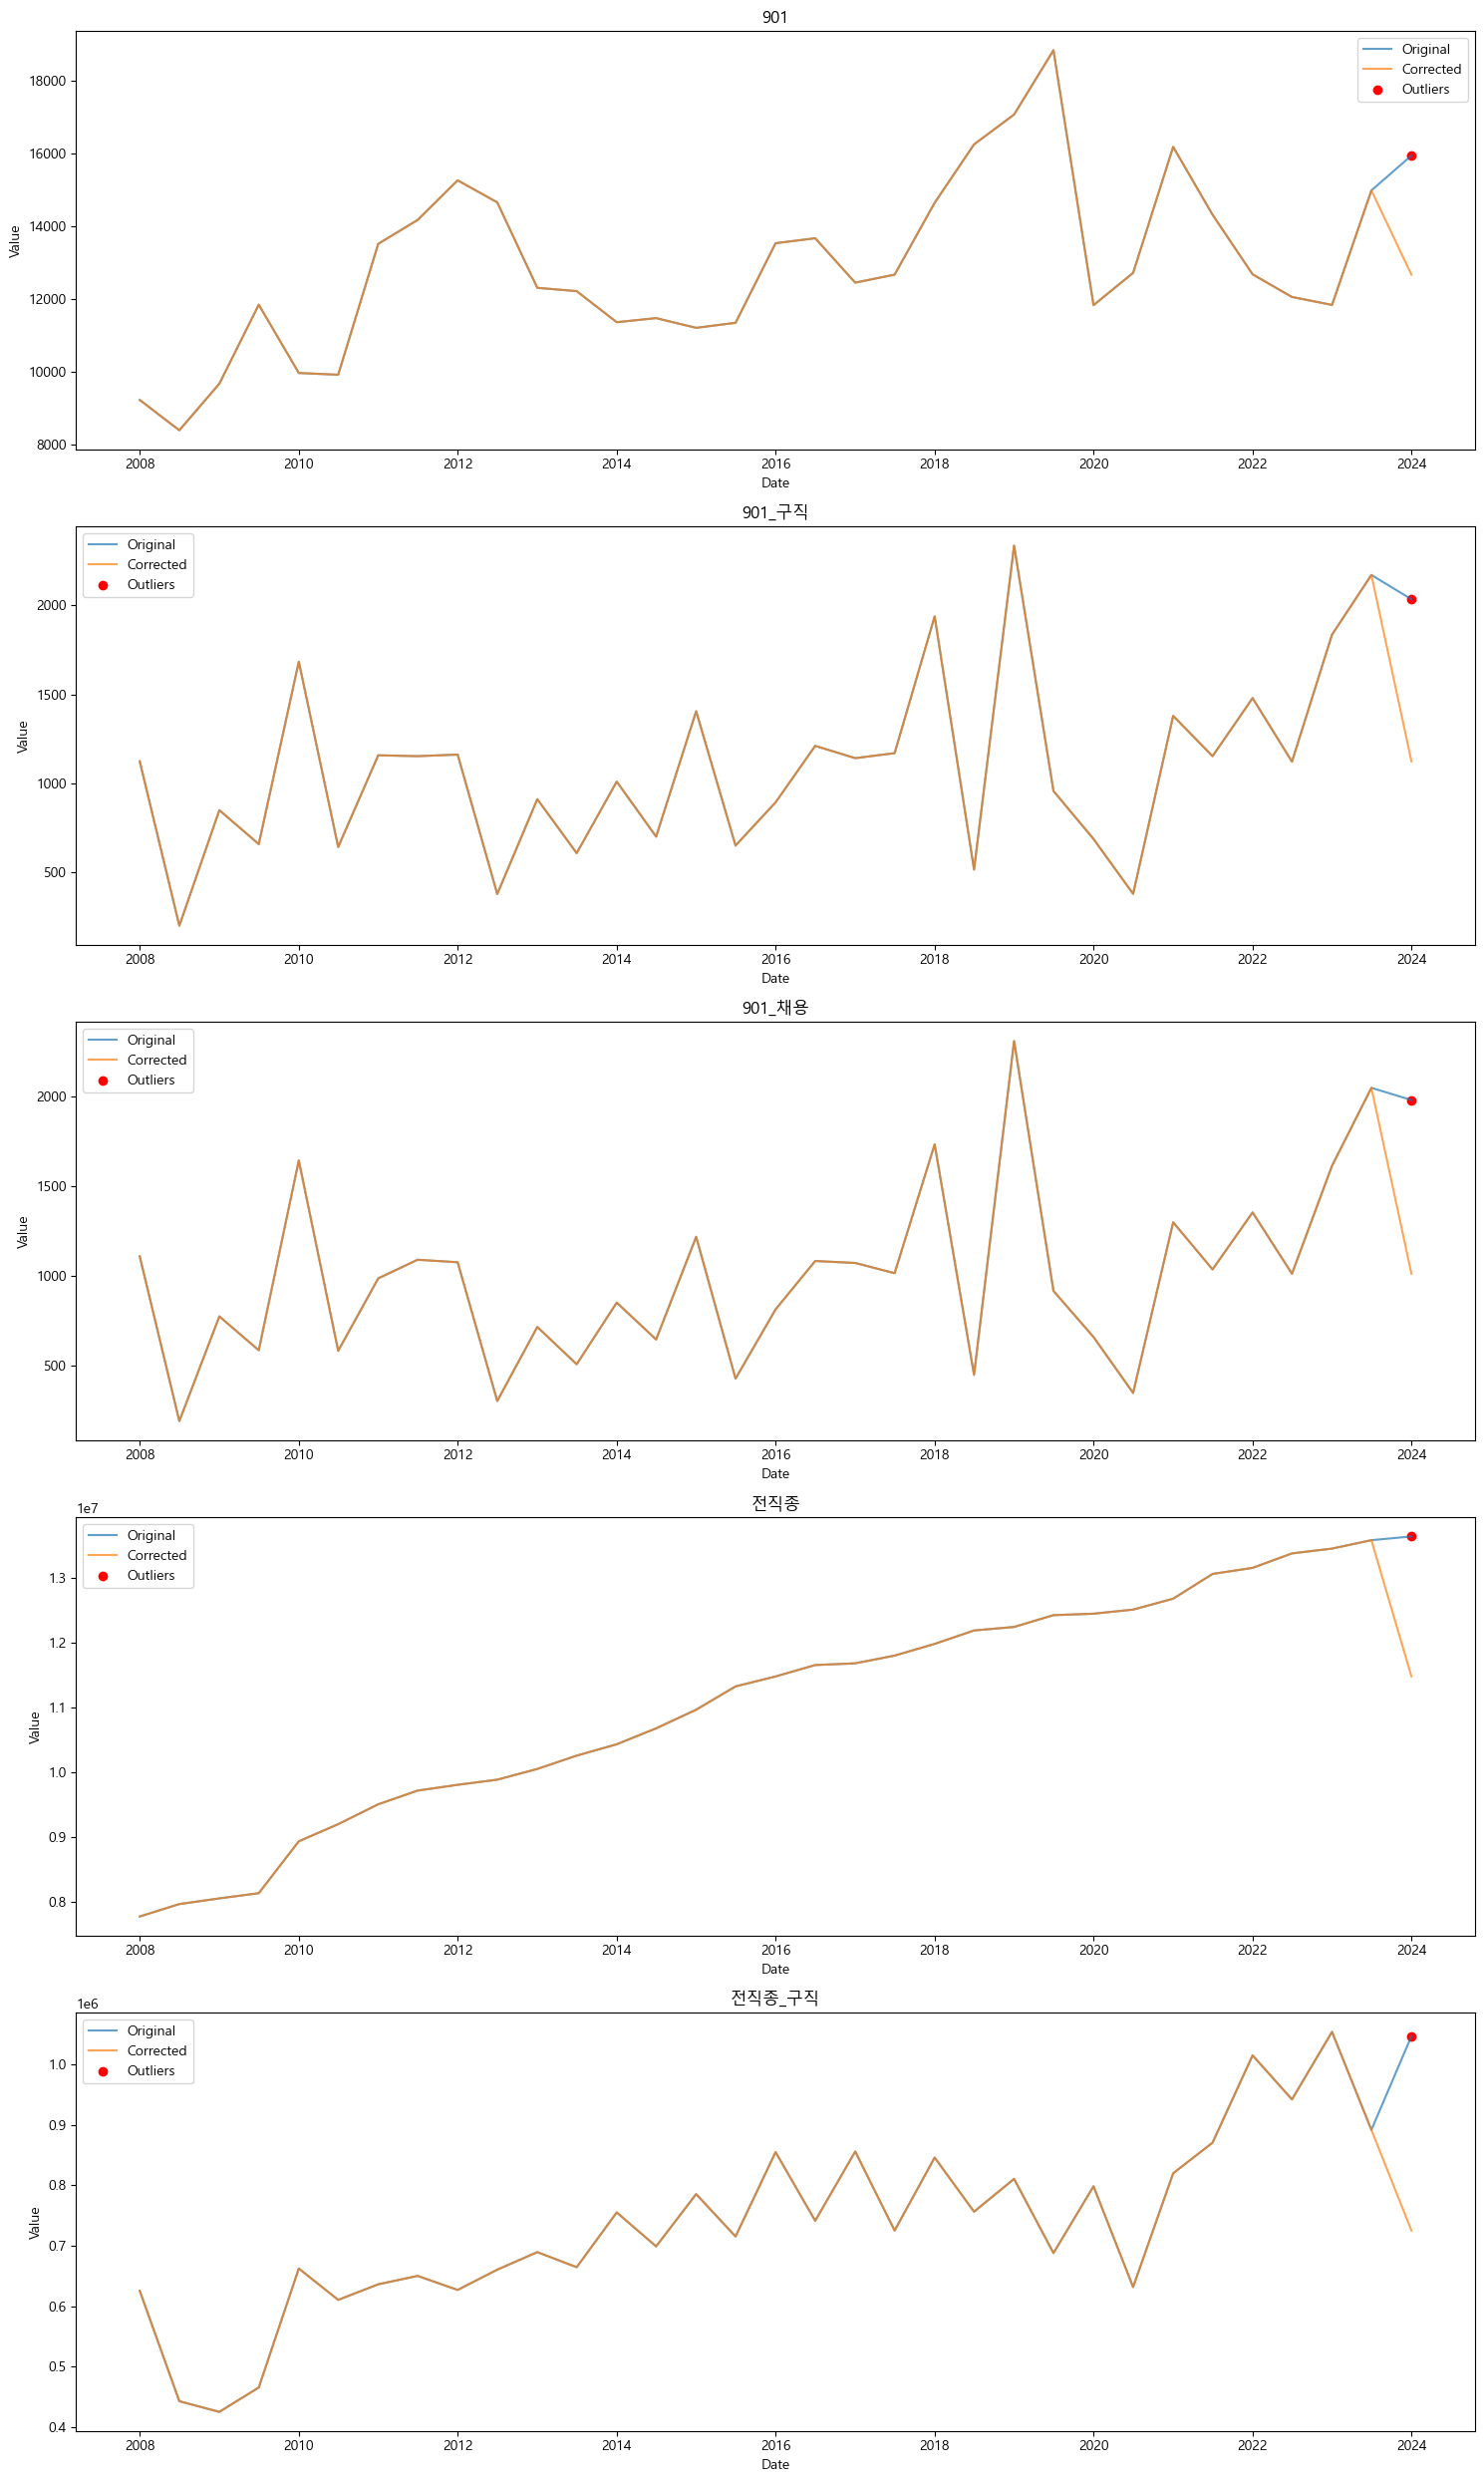

이상치가 수정된 데이터가 'ml_outlier_corrected_data.csv' 파일로 저장되었습니다.


In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

def convert_date(date_str):
    year, half = date_str.split('.')
    month = '01' if half.endswith('1/2') else '07'
    return pd.to_datetime(f'{year}-{month}-01')


# 데이터 로드 (예시 데이터를 사용하므로 실제 데이터에 맞게 조정이 필요할 수 있습니다)
df = keco_cleaned.copy()
# 인덱스를 datetime으로 변환
df.index = df.index.map(convert_date)

# 시계열 특성을 고려한 피처 엔지니어링
def add_time_features(df):
    df_features = df.copy()
    df_features['year'] = df.index.year
    df_features['month'] = df.index.month
    df_features['day'] = df.index.day
    return df_features

# Isolation Forest를 이용한 이상치 탐지 및 수정 함수
def detect_and_correct_outliers_with_if(df, contamination=0.03):
    df_features = add_time_features(df)
    
    clf = IsolationForest(contamination=contamination, random_state=42)
    outlier_labels = clf.fit_predict(df_features)
    
    outliers = outlier_labels == -1
    corrected_df = df.copy()
    
    for column in df.columns:
        column_median = df[column].median()
        corrected_df.loc[outliers, column] = column_median
    
    return corrected_df, outliers

# 이상치 탐지 및 수정 적용
corrected_df, outliers = detect_and_correct_outliers_with_if(df)

# 수정된 데이터와 원본 데이터의 차이 계산
diff_df = corrected_df - df

# 결과 출력
print("이상치 수정 결과:")
print(corrected_df.head())
print("\n수정된 데이터와 원본 데이터의 차이:")
print(diff_df.head())

# 이상치 수정 전후 비교 시각화 (처음 5개 열에 대해)
fig, axes = plt.subplots(5, 1, figsize=(15, 25))
for i, column in enumerate(df.columns[-6:-1]):
    axes[i].plot(df.index, df[column], label='Original', alpha=0.7)
    axes[i].plot(df.index, corrected_df[column], label='Corrected', alpha=0.7)
    axes[i].scatter(df.index[outliers], df[column][outliers], color='red', label='Outliers')
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')
    axes[i].legend()
plt.tight_layout()
plt.show()

# 수정된 데이터를 CSV 파일로 저장
corrected_df.to_csv('ml_outlier_corrected_data.csv')
print("이상치가 수정된 데이터가 'ml_outlier_corrected_data.csv' 파일로 저장되었습니다.")

In [8]:
!pip install prophet

In [9]:
import pandas as pd
import numpy as np
from scipy import interpolate

from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# 날짜 변환 함수
def convert_date(date_str):
    date_str=str(date_str)
    year, half = date_str.split('.')
    month = '01' if half.endswith('1/2') else '07'
    return pd.to_datetime(f'{year}-{month}-01')

# 데이터 불러오기
df = df.copy()  # result_ksco가 이미 로드되어 있다고 가정

# 인덱스를 datetime으로 변환  ->주석 확인할 것
#df.index = df.index.map(convert_date)

# 데이터를 숫자로 변환하고 숫자로 변환할 수 없는 값은 NaN으로 처리
for column in df.columns:
    df[column] = pd.to_numeric(df[column].astype(str).str.replace(',', ''), errors='coerce')

# 원본 데이터 확인
print("원본 데이터:")
print(df.head())
print(df.dtypes)

# 2008년 1월부터 2024년 12월까지의 월별 날짜 범위 생성
date_range = pd.date_range(start='2008-01-01', end='2023-01-01', freq='MS')

# 월별 데이터프레임 생성
df_monthly = pd.DataFrame(index=date_range, columns=df.columns)

# 원본 데이터 삽입
for date, row in df.iterrows():
    df_monthly.loc[date] = row

# 삽입된 데이터 확인
print("\n원본 데이터 삽입 후 월별 데이터:")
print(df_monthly.head(20))  # 처음 20개의 행 확인
print(df_monthly.tail(20))  # 마지막 20개의 행 확인

# 큐빅 스플라인 보간법 적용 함수
def cubic_spline_interpolation(series):
    series = pd.to_numeric(series, errors='coerce')
    non_nan = series.dropna()
    if len(non_nan) < 4:
        return series.interpolate(method='linear')
    x = np.arange(len(series))
    y = series.values
    mask = ~np.isnan(y)
    if np.sum(mask) < 4:
        return series.interpolate(method='linear')
    try:
        f = interpolate.interp1d(x[mask], y[mask], kind='cubic', fill_value='extrapolate')
        return pd.Series(f(x), index=series.index)
    except:
        return series.interpolate(method='linear')

# 각 열에 대해 큐빅 스플라인 보간 적용
for column in df_monthly.columns:
    df_monthly[column] = cubic_spline_interpolation(df_monthly[column])

# 큐빅 스플라인 보간법 적용 후 데이터 확인
print("\n큐빅 스플라인 보간 후 월별 데이터:")
print(df_monthly.head(20))  # 처음 20개의 행 확인
print(df_monthly.tail(20))  # 마지막 20개의 행 확인

# 보간된 데이터를 CSV 파일로 저장
df_monthly.to_csv('monthly_data_with_interpolation.csv')
print("보간된 데이터가 'monthly_data_with_interpolation.csv' 파일에 저장되었습니다.")

# 데이터 시각화 (선택 사항)
import matplotlib.pyplot as plt

# 처음 5개 열에 대해 그래프 그리기
fig, axes = plt.subplots(5, 1, figsize=(5, 15))
for i, column in enumerate(df_monthly.columns[161:171]):
    df_monthly[column].plot(ax=axes[i])
    axes[i].set_title('')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')
plt.tight_layout()
plt.show()
df_monthly


원본 데이터:
직종별          011  011_구직  011_채용    012  012_구직  012_채용    013  013_구직  \
2008-01-01  6586     153     143  47852     328     322  65474     769   
2008-07-01  5983      57      59  49170     231     227  65403     290   
2009-01-01  7181     102      94  49865     294     274  67183     395   
2009-07-01  7899      96      96  49580     247     232  65800     412   
2010-01-01  8293     125     120  52419     521     468  72597     693   

직종별         013_채용    015  ...  885_채용     890  890_구직  890_채용    901  901_구직  \
2008-01-01     702  21328  ...    1970  147677   16510   12334   9215    1123   
2008-07-01     286  22410  ...    1470  133047    9302    7392   8381     198   
2009-01-01     370  20401  ...    1446  178447    9599    7746   9662     848   
2009-07-01     397  26632  ...    1541  205720   20152   15801  11832     657   
2010-01-01     619  26215  ...    1862  178042   18802   13696   9955    1684   

직종별         901_채용      전직종  전직종_구직  전직종_채용  
2008-01-01    

PermissionError: [Errno 13] Permission denied: 'monthly_data_with_interpolation.csv'

In [166]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from scipy import stats
# 2003년부터 2007년까지의 날짜 범위 생성
past_dates = pd.date_range(start='2003-01-01', end='2007-12-31', freq='MS')

def forecast_column_prophet(column, changepoint_prior_scale=0.05, seasonality_prior_scale=10.0, seasonality_mode='additive'):
    try:
        data = df_monthly[column].dropna().reset_index()
        data.columns = ['ds', 'y']
        if len(data) < 2:
            print(f"Column {column} has insufficient data for forecasting.")
            return pd.Series(np.nan, index=past_dates)
        
        model = Prophet()
        model.fit(data)
        
        future = pd.DataFrame(past_dates, columns=['ds'])
        forecast = model.predict(future)
        
        return pd.Series(forecast['yhat'].values, index=past_dates)
    except Exception as e:
        print(f"Column {column} could not be processed. Error: {str(e)}")
        return pd.Series(np.nan, index=past_dates)

def adjust_slope(series, start_value, end_value):
    # 선형 보간 생성
    linear_interp = np.linspace(start_value, end_value, len(series))
    
    # 원래 시리즈와 선형 보간의 가중 평균 계산
    # 시작점에 가까울수록 선형 보간에 더 큰 가중치 부여
    weights = np.linspace(0.8, 0.2, len(series))
    adjusted = weights * linear_interp + (1 - weights) * series
    
    return pd.Series(adjusted, index=series.index)

# 순차적으로 예측 실행 및 기울기 조정
forecasts = {}
for column in df_monthly.columns:
    print(f"Processing column: {column}")
    prediction = forecast_column_prophet(column, changepoint_prior_scale=0.01, seasonality_prior_scale=3.0, seasonality_mode='multiplicative')
    
    # 2003년 1월 값을 2008년 1월 값의 80%로 설정 (이 비율은 조정 가능)
    start_value = df_monthly[column].iloc[0] * 0.94
    end_value = df_monthly[column].iloc[0]
    
    adjusted_prediction = adjust_slope(prediction, start_value, end_value)
    forecasts[column] = adjusted_prediction

df_forecast = pd.DataFrame(forecasts, index=past_dates)

# 예측 결과와 보간된 데이터 합치기
df_combined = pd.concat([df_forecast, df_monthly])

# 결과 정렬
df_combined = df_combined.sort_index()

# 결과 확인
print("\n최종 결과:")
print(df_combined.head())
print(df_combined.tail())

# CSV 파일로 저장
df_combined.to_csv('monthly_data_with_adjusted_predictions.csv')

# 데이터 시각화
fig, axes = plt.subplots(20, 1, figsize=(15, 25))
for i, column in enumerate(df_combined.columns[-20:-1]):
    df_combined[column].plot(ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')
plt.tight_layout()
plt.show()

# 전직종 열과 다른 직종별 열들의 합 비교
if '전직종' in df_combined.columns:
    df_combined['calculated_total'] = df_combined.drop(['전직종', '전직종_구직', '전직종_채용'], axis=1, errors='ignore').sum(axis=1)
    plt.figure(figsize=(12, 6))
    df_combined[['전직종', 'calculated_total']].plot()
    plt.title('전직종 vs 다른 직종들의 합')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend(['전직종', '다른 직종들의 합'])
    plt.show()
# 데이터 로드 (2008~2024 월별 데이터

Processing column: 011


14:59:05 - cmdstanpy - INFO - Chain [1] start processing
14:59:06 - cmdstanpy - INFO - Chain [1] done processing
14:59:06 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
14:59:06 - cmdstanpy - INFO - Chain [1] start processing
14:59:07 - cmdstanpy - INFO - Chain [1] done processing
14:59:07 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
14:59:07 - cmdstanpy - INFO - Chain [1] start processing


Column 011 could not be processed. Error: Error during optimization! Command 'C:\Users\Jongmin\anaconda3\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=19265 data file=C:\Users\Jongmin\AppData\Local\Temp\tmppdppqs0e\dum2ziwl.json init=C:\Users\Jongmin\AppData\Local\Temp\tmppdppqs0e\0ok22u3p.json output file=C:\Users\Jongmin\AppData\Local\Temp\tmppdppqs0e\prophet_modelxd7ihjqt\prophet_model-20240712145906.csv method=optimize algorithm=newton iter=10000' failed: 
Processing column: 011_구직


KeyboardInterrupt: 